In [1]:
# it is used to Suppresses all warnings (e.g., deprecations, runtime issues, user alerts) 

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

housing_data = pd.read_csv("Housing_Price.csv")

# Display dataset info
print("Dataset Information:\n")
housing_data.info()
print("\nSummary Statistics:\n", housing_data.describe())


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null  


Missing Data Overview:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


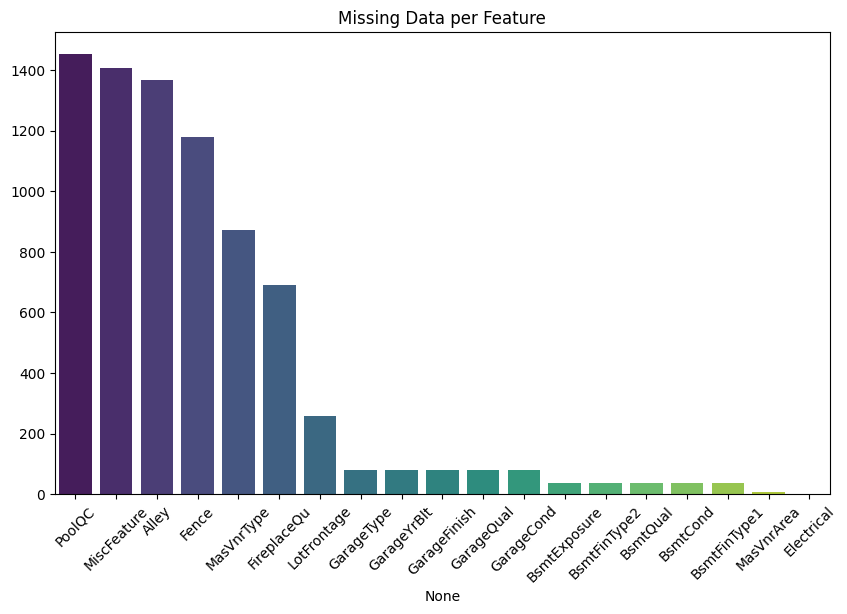

In [4]:
# Handle missing data
missing_data = housing_data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print("\nMissing Data Overview:\n", missing_data)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Missing Data per Feature")
plt.show()


Observations from the Summary:
High Missingness:

Features like PoolQC, MiscFeature, and Alley have over 90% missing values. These might not provide significant information and could be dropped.
Moderate Missingness:

Features like Fence, FireplaceQu, and LotFrontage have a considerable number of missing values. These can be imputed based on domain knowledge or data patterns.
Low Missingness:

Columns like MasVnrType, GarageType, and Electrical have relatively fewer missing values and are important for analysis.

In [5]:
# Drop columns with more than 50% missing values
high_missing = ['PoolQC', 'MiscFeature', 'Alley','Fence']
housing_data.drop(columns=high_missing, inplace=True)

# Verify remaining columns
print("Remaining Columns after Dropping High Missingness:\n", housing_data.columns)


Remaining Columns after Dropping High Missingness:
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'Ga

In [6]:
# Fill missing values in numerical features
housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].median(), inplace=True)
housing_data['MasVnrArea'].fillna(housing_data['MasVnrArea'].median(), inplace=True)
#Median is robust to outliers, which is crucial for features like LotFrontage that may have extreme values.

In [7]:
# Fill missing values in categorical features
categorical_features = ['MasVnrType', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Electrical']
for feature in categorical_features:
    housing_data[feature].fillna(housing_data[feature].mode()[0], inplace=True)
#For categorical features like MasVnrType, GarageType, and Electrical, we can use the mode

In [8]:
# Fill missing basement-related features with "None" for categorical and 0 for numerical
basement_categorical = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for feature in basement_categorical:
    housing_data[feature].fillna('None', inplace=True)

basement_numerical = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for feature in basement_numerical:
    housing_data[feature].fillna(0, inplace=True)

# Fill missing fireplace quality with "None"
housing_data['FireplaceQu'].fillna('None', inplace=True)


In [9]:
# Fill missing garage-related features
garage_categorical = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for feature in garage_categorical:
    housing_data[feature].fillna('None', inplace=True)

housing_data['GarageYrBlt'].fillna(0, inplace=True)
housing_data['GarageCars'].fillna(0, inplace=True)
housing_data['GarageArea'].fillna(0, inplace=True)


Text(0, 0.5, 'Frequency')

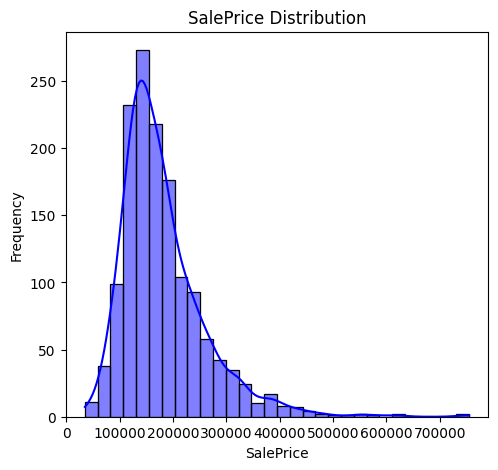

In [19]:
# SalePrice Distribution
# Target variable analysis
#Purpose: Understand the distribution of the target variable to identify skewness and outliers.
plt.figure(figsize=(12, 5))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(housing_data['SalePrice'], kde=True, bins=30, color='blue')
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')


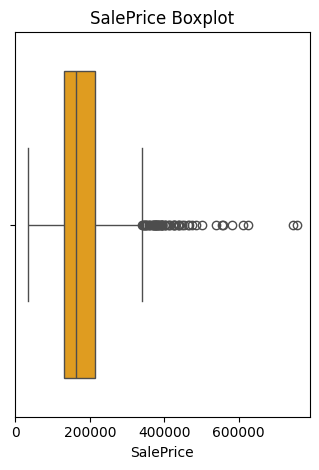

In [16]:

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=housing_data['SalePrice'], color='orange')
plt.title('SalePrice Boxplot')
plt.xlabel('SalePrice')

plt.tight_layout()
plt.show()

In [18]:
# Check skewness of SalePrice
print("Skewness of SalePrice:", housing_data['SalePrice'].skew())


Skewness of SalePrice: 1.8828757597682129


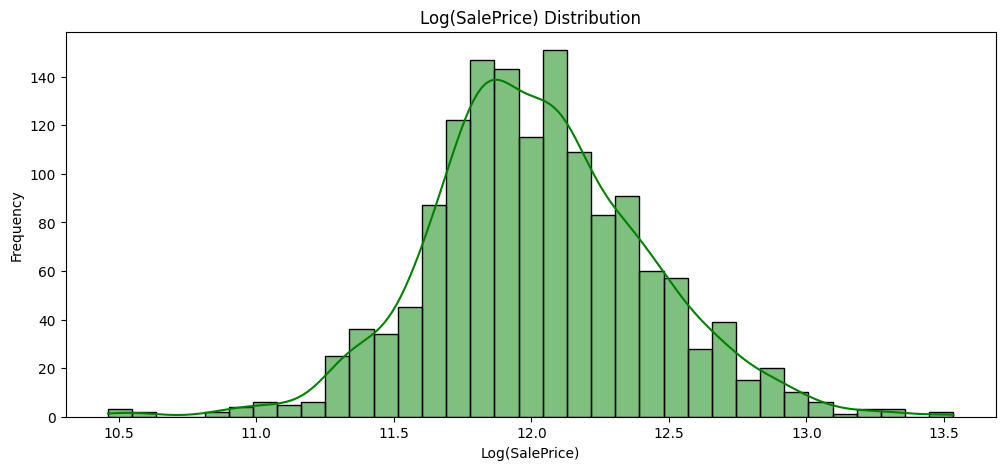

In [20]:
# Apply log transformation
housing_data['Log_SalePrice'] = np.log(housing_data['SalePrice'])

# Recheck distribution after transformation
plt.figure(figsize=(12, 5))
sns.histplot(housing_data['Log_SalePrice'], kde=True, color='green')
plt.title('Log(SalePrice) Distribution')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')
plt.show()

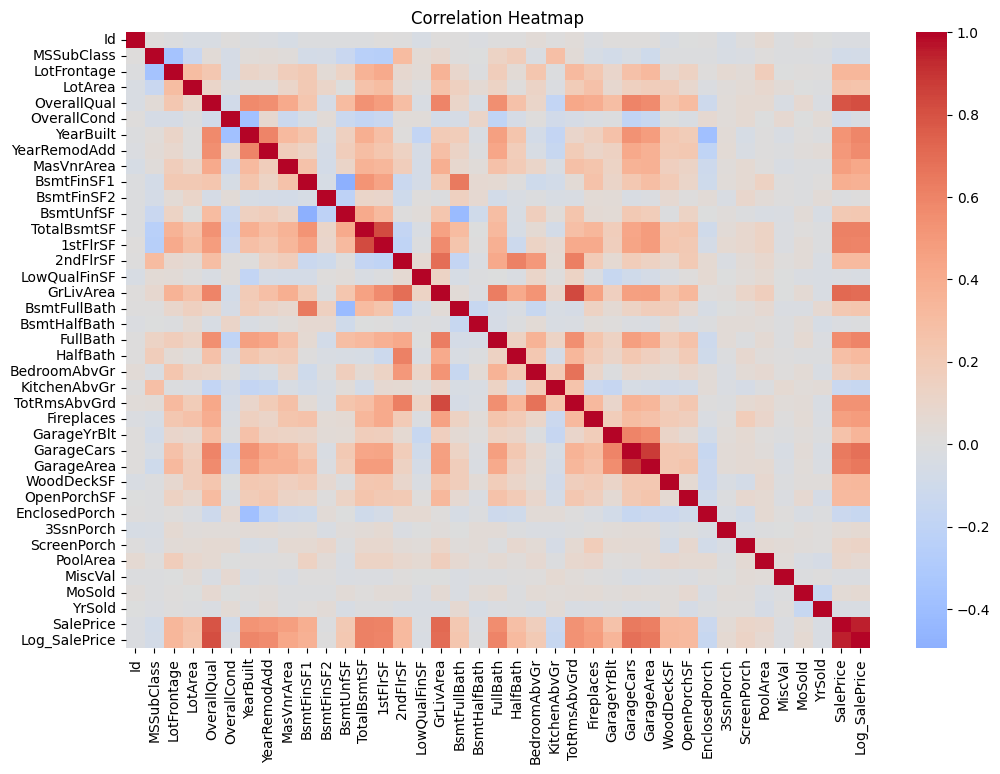


Features Most Correlated with SalePrice:
 SalePrice        1.000000
Log_SalePrice    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
Name: SalePrice, dtype: float64


In [22]:
# Select only numeric columns for correlation
numeric_data = housing_data.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Display the strongest correlations with SalePrice
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nFeatures Most Correlated with SalePrice:\n", saleprice_corr.head(10))



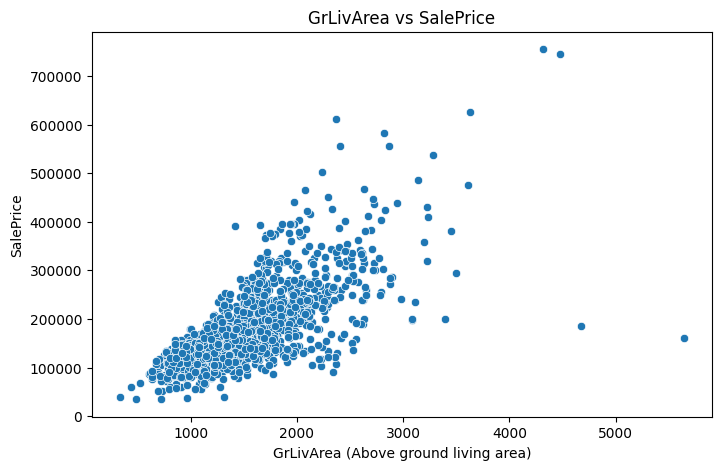

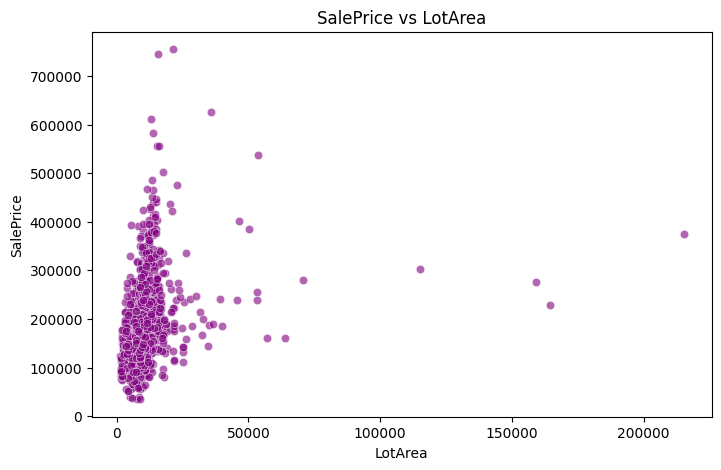

In [32]:
# Scatterplot: GrLivArea vs SalePrice
plt.figure(figsize=(8, 5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=housing_data)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea (Above ground living area)')
plt.ylabel('SalePrice')
plt.show()
# Scatterplot: SalePrice vs LotArea
plt.figure(figsize=(8, 5))
sns.scatterplot(x=housing_data['LotArea'], y=housing_data['SalePrice'], alpha=0.6, color='purple')
plt.title("SalePrice vs LotArea")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

For Categorical Features

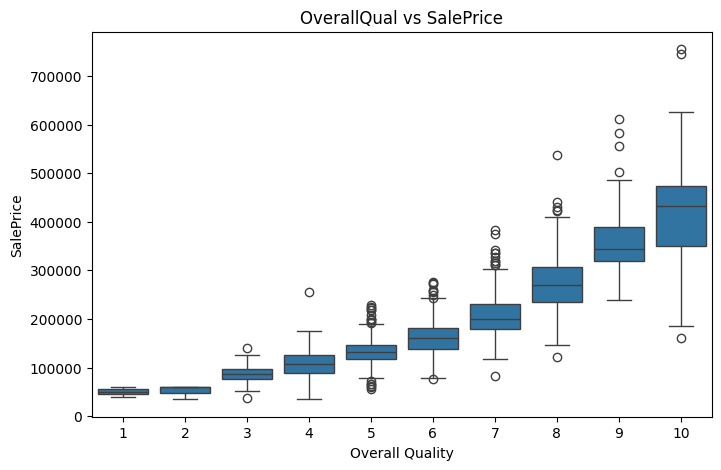

In [24]:
# Boxplot: OverallQual vs SalePrice
plt.figure(figsize=(8, 5))
sns.boxplot(x='OverallQual', y='SalePrice', data=housing_data)
plt.title('OverallQual vs SalePrice')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()


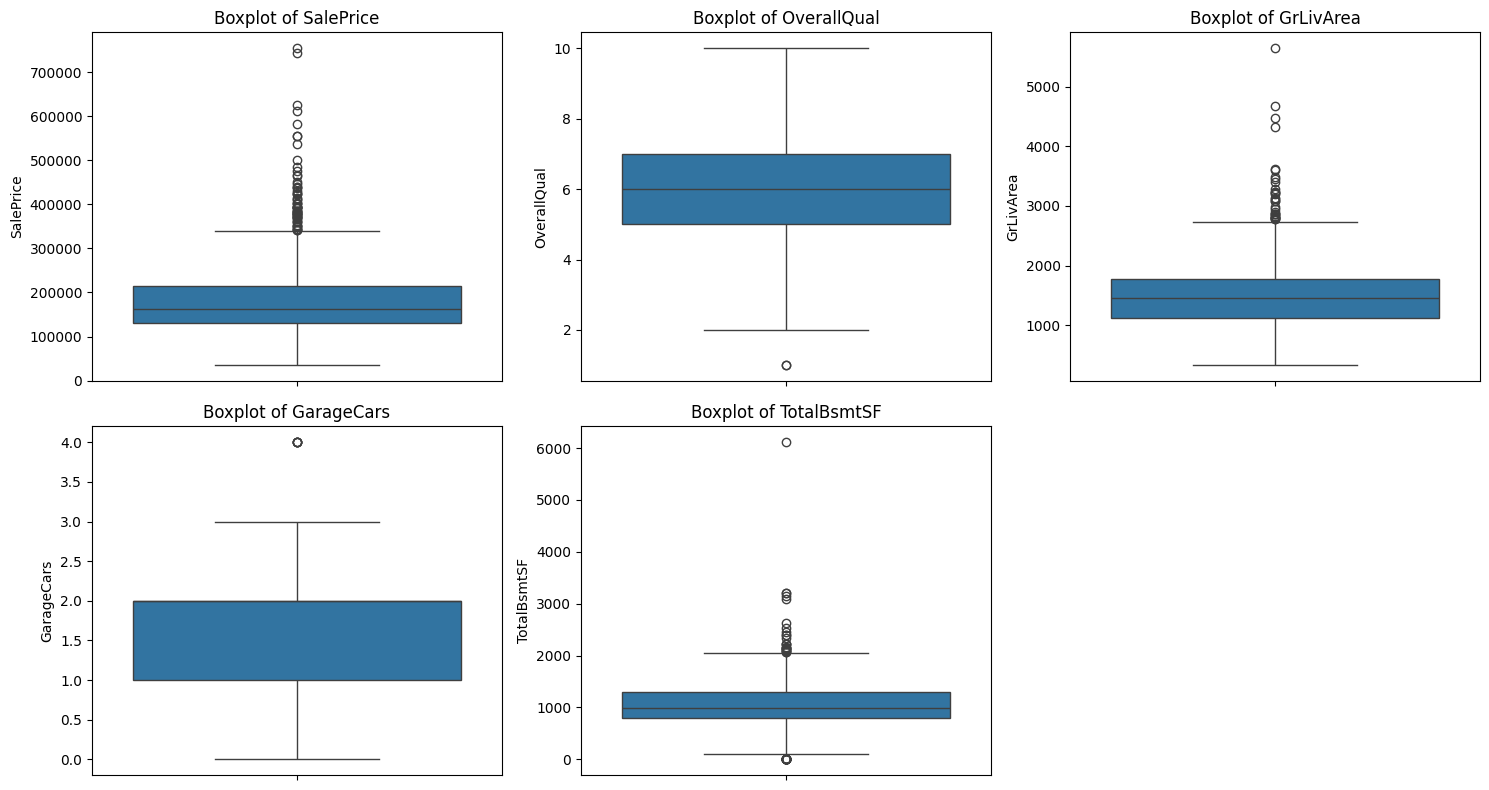

In [33]:
# Visualize outliers with boxplots
key_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
plt.figure(figsize=(15, 8))

for i, col in enumerate(key_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=housing_data[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()




In [37]:
print("Original dataset size:", housing_data.shape[0])
data_filtered = housing_data[housing_data['SalePrice'] < 400000]
print("New dataset size after outlier removal:", data_filtered.shape[0])


Original dataset size: 1460
New dataset size after outlier removal: 1432
